Задание 1: Анализ общего количества продаж по дням недели

Постройте столбчатую диаграмму, показывающую распределение общего количества продаж кофе по дням недели. Используйте дни недели на оси X и общее количество продаж на оси Y. Какие дни недели имеют наибольшие продажи?

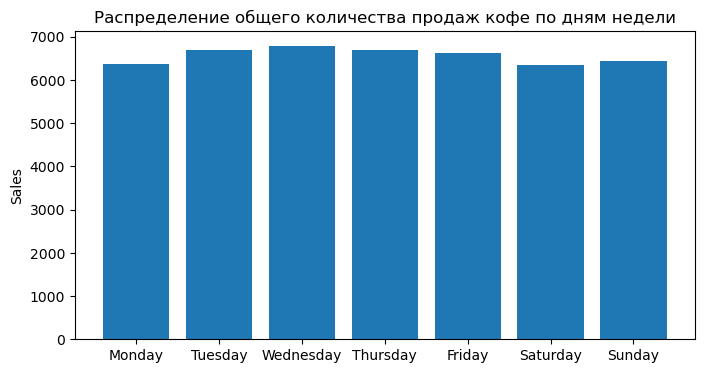

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('coffee_sales_data.csv')

plt.figure(figsize=(8,4))
plt.bar(df['День недели'].unique(),df.groupby('День недели')['Количество Продаж'].sum())
plt.title('Распределение общего количества продаж кофе по дням недели')
plt.ylabel('Sales')
plt.show()

Задание 2: Анализ цен на разные типы кофе

Создайте boxplot, который покажет распределение цен на разные типы кофе (Эспрессо, Латте, Капучино). Используйте тип кофе на оси X и цены на оси Y. Какой тип кофе имеет наибольший разброс цен?

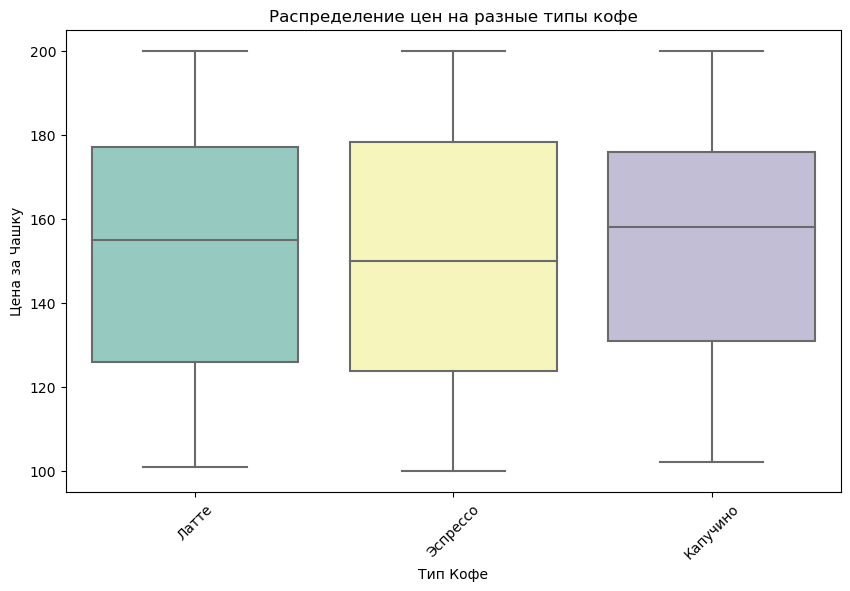

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Тип Кофе', y='Цена за Чашку', data=df, palette='Set3')
plt.title('Распределение цен на разные типы кофе')
plt.xlabel('Тип Кофе')
plt.ylabel('Цена за Чашку')
plt.xticks(rotation=45)
plt.show()

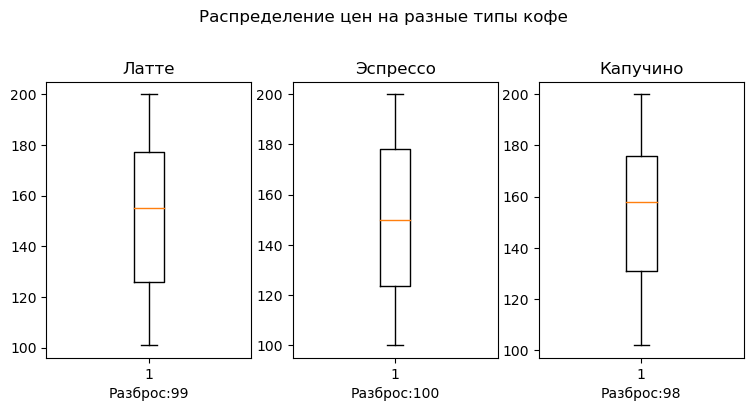

In [11]:
types_of_coffee = df['Тип Кофе'].unique() 
fig, axs = plt.subplots(nrows=1, ncols=len(types_of_coffee), figsize=(9, 4))
fig.subplots_adjust(top=0.8)

spread0 = df[(df['Тип Кофе']==types_of_coffee[0])]['Цена за Чашку'].max()-df[(df['Тип Кофе']==types_of_coffee[0])]['Цена за Чашку'].min()
spread1 = df[(df['Тип Кофе']==types_of_coffee[1])]['Цена за Чашку'].max()-df[(df['Тип Кофе']==types_of_coffee[1])]['Цена за Чашку'].min()
spread2 = df[(df['Тип Кофе']==types_of_coffee[2])]['Цена за Чашку'].max()-df[(df['Тип Кофе']==types_of_coffee[2])]['Цена за Чашку'].min()
data0 = df[(df['Тип Кофе']==types_of_coffee[0])]['Цена за Чашку']
axs[0].boxplot(data0)
axs[0].set_title(types_of_coffee[0])
axs[0].set_xlabel(f'Разброс:{spread0}')

data1 = df[(df['Тип Кофе']==types_of_coffee[1])]['Цена за Чашку']
axs[1].boxplot(data1)
axs[1].set_title(types_of_coffee[1])
axs[1].set_xlabel(f'Разброс:{spread1}')
    
data2 = df[(df['Тип Кофе']==types_of_coffee[2])]['Цена за Чашку']
axs[2].boxplot(data2)
axs[2].set_title(types_of_coffee[2])
axs[2].set_xlabel(f'Разброс:{spread2}')
    
fig.suptitle('Распределение цен на разные типы кофе')
plt.show()


Задание 3: Анализ взаимосвязи между выходными и продажами

Исследовать влияние выходных дней на продажи кофе в магазине с помощью столбчатой диаграммы, показывающей разницу в общем количестве продаж между выходными и будними днями. Определить, в какие дни наблюдается больше продаж

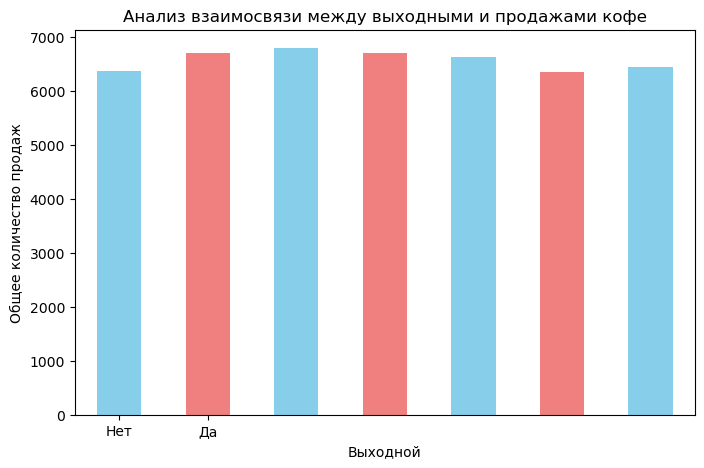

In [13]:
sales_by_weekend = df.groupby('День недели')['Количество Продаж'].sum()

plt.figure(figsize=(8, 5))
sales_by_weekend.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Анализ взаимосвязи между выходными и продажами кофе')
plt.xlabel('Выходной')
plt.ylabel('Общее количество продаж')
plt.xticks(rotation=0, ticks=[0, 1], labels=['Нет', 'Да'])
plt.show()

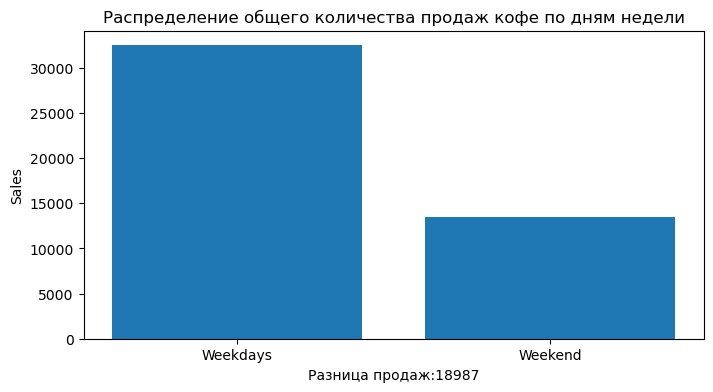

In [107]:
task3 = df
task3.loc[(task3['День недели']=='Saturday'),['День недели']] = 'Weekend'
task3.loc[(task3['День недели']=='Sunday'),['День недели']] = 'Weekend'
task3.loc[(task3['День недели']!='Weekend'),['День недели']] = 'Weekdays'

difference = task3.groupby('День недели')['Количество Продаж'].sum()[0]-task3.groupby('День недели')['Количество Продаж'].sum()[1]

plt.figure(figsize=(8,4))
plt.bar(task3['День недели'].unique(),task3.groupby('День недели')['Количество Продаж'].sum())
plt.title('Распределение общего количества продаж кофе по дням недели')
plt.ylabel('Sales')
plt.xlabel(f'Разница продаж:{difference}')
plt.show()